<h1>Genetic Algorithm in 15 lines of Python code</h1>
<h4>A simple yet powerful genetic algorithm implementation used to train a neural network in 15 lines of code.</h4>

<p style="font-size:smaller;"><b>Disclaimer: </b> I am not a machine learning expert by any means, I mostly do web development, so this is not my forte at all, but I have enjoyed messing around writing basic neural nets and genetic algorithms and am just trying to share what little I've learned to other neophytes out there.</p>
<p><b>Summary:</b>
This is a spinoff of a really great tutorial called "A Neural Network in 11 lines of Python" found here: < http://iamtrask.github.io/2015/07/12/basic-python-network/ > So please go through that article first otherwise this may not make any sense. <br />
Here I will show you how I wrote a basic genetic algorithm (GA) that finds an optimal set of weights to train the neural network. I'm not going to go into detail about what a genetic algorithm is, so if you're already not familiar with them, please do some googling. 
<p style="font-size:small;">By the way, GAs are generally much slower than good ol' gradient descent, but I think applying GAs to a simple neural net is a more fun way to learn it. Also, GAs may be good for finding an optimal set of <em>hyperparameters</em> for a neural net (e.g. the net architecture).</p>

<h3>Just Give Me The Code:</h3>

In [ ]:
import random, numpy as np, NeuralNet as NN
params = [100, 0.05, 250, 3, 20]
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(params[0],params[3]),replace=False)
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((params[0], 2))
for i in range(params[2]):
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].reshape(3,1)))]) for x in range(params[0])])
	winners = np.zeros((params[4], params[3])) #20x2
	for n in range(len(winners)):
		selected = np.random.choice(range(len(fitVec)), params[4]/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners
	nextPop[len(winners):] = np.array([np.array(np.random.permutation(np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0))) for x in range(winners.shape[1])]).T
	curPop = np.multiply(nextPop, np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < params[1] else 1 for x in range(nextPop.size)]).reshape(nextPop.shape))

<br />Ok, so I'm assuming that code is completely not helpful at this point, and in fact, it won't even run if you tried to copy and paste and run it because you also need the code for the Neural Network, which I stored in a separate file and imported. Let's first talk about the general steps in implementing a genetic algorithm and then we'll break down the code line by line, add in some print() statements to see what's going on, and maybe even make some fancy graphs.<p>Essentially, a genetic algorithm is a search algorithm that will hopefully find an optimal solution through a process that simulates natural selection and evolution. Here's the overall flow for how they work:</p>

+ We generate a population of random potential solutions
+ Then we iterate through this population and assess the fitness of (i.e. how good of a solution) each solution
+ We prefentially select solutions with higher fitness to survive and make it to the next generation.
Solutions with higher fitness have a higher probability of being selected
+ These "winner" solutions then "mate" and produce offspring solutions. For example, if our solutions are simply 
vectors of integers, then mating vector1 with vector2 involves taking a few elements from vector1 and combining it with a few elements of vector2 to make a new offspring vector of the same dimensions. Vector1: [1 2 3], Vector2: [4 5 6]. Vector1 mates with Vector2 to produce [4 5 3] and [1 2 6]
+ So now we have a new population with the top solutions from the last generation along with new offspring solutions, at this point, we will iterate over our solutions and randomly mutate some of them to make sure to introduce new "genetic diversity" into every generation to prevent premature convergence on a local optimum.
+ Repeat this process for X number of generations or until we have a sufficiently good solution

As a quick review, the iamtrask article shows you how to implement a really simple 2-layer (1 input layer, 1 output layer) neural network that is trained to solve this problem:
<table class="tg" style="width: 234px; margin-right: 65vw;">
  <tbody><tr>
    <th class="tg-5rcs" colspan="3">Inputs</th>
    <th class="tg-5rcs">Output</th>
  </tr>
  <tr>
    <td class="tg-4kyz">0</td>
    <td class="tg-4kyz">0</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">0</td>
  </tr>
  <tr>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">1</td>
  </tr>
  <tr>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">0</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">1</td>
  </tr>
  <tr>
    <td class="tg-4kyz">0</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">1</td>
    <td class="tg-4kyz">0</td>
  </tr>
</tbody></table>
</p>

As you can see, the output simply depends on whether the first input is a 1 or not. The 2nd input is irrelevant and the 3rd input is our bias (explained elsewhere).
<p>If you train the 2-layer neural net (thus one set of weights) using gradient descent using the implementation in the iamtrask article, you will get a set of weights close to this:</p>

> [[ 9.67299303],[-0.2078435],[-4.62963669]]

And if you calculate the cost using these weights (the cost function is a simple difference between expected and actual output values), you get...

> Cost: 0.0557587344696

Pretty low right? Now just to jump ahead a bit, when I tuned the genetic algorithm and ran it a couple of times, it found a completely different set of weights:

> [[  3.09686945e+05  -7.88485054e-03  -1.67477116e+03]]
> <br />Cost: 0.0

Obviously these weights resulted in a significantly lower cost (better fitness). In all honesty however, for this simplistic problem, the difference in cost is pretty inconsequential. In more complex problems, a cost that low is probably resulting in overfitting. Not to mention, genetic algorithms almost certainly will take longer to converge than gradient descent. But let's ignore all those details, we just want to build a genetic algorithm because they're cool.

Before I jump into the details of the genetic algorithm, I want to revisit the neural net. Here's the code for the neural net I implemented, which is an adaptation from the one by iamtrask:

In [3]:
import numpy as np
import math

X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1]]) #training data X
y = np.array([[0,0,1,1, 1, 0, 0]]).T #training data Y
syn0 = 2*np.random.random((3,1)) - 1 #randomize intial weights (Theta)

def runForward(X, theta): #this runs our net and returns the output
	return sigmoid(np.dot(X, theta))
def costFunction(X, y, theta): #our cost function, simply determines the arithmetic difference between the expected y and our actual y
	m = float(len(X))
	hThetaX = np.array(runForward(X, theta))
	return np.sum(np.abs(y - hThetaX))
def sigmoid(x): return 1 / (1 + np.exp(- x)) #Just our run-of-the-mill sigmoid function

You should be able to figure this out if you've run through the iamtrask article or already have an understanding of neural nets. Just a note: I call the weights Theta. Let's go ahead and run this network just to make sure it's working right.

In [4]:
runForward(np.array([0,1,1]), syn0)

array([ 0.31364485])

We expect to get about [ 0 ] for an input of [0,1,1], but obviously when we use random weights, that's not likely to happen. Let's try again with those weights I got from doing gradient descent (not shown here).

In [5]:
optimal_theta = np.array([[ 9.67299303],[-0.2078435],[-4.62963669]])
runForward(np.array([0,1,1]), optimal_theta)

array([ 0.00786466])

As you can see, we get a value pretty close to 0, as expected. Nice. Okay, so now let's try the weights I got from running the genetic algorithm.

In [6]:
optimal_theta_ga = np.array([3.09686945e+05,-7.88485054e-03,-1.67477116e+03])
runForward(np.array([0,1,1]), optimal_theta_ga)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


0.0

Wow! The result we get here is so close to zero we get an overflow warning. Just ignore that, the point is, the error/cost is really, really low. (Again, this is not necessarily a good thing...becauase of potential overfitting, but for this particular problem, overfitting is fine). Just to make things really clear, let's take a look at what these weights are doing diagramatically.
<div>
<img src="images/NNDiagram1.png" width="200px" style="display:inline-block;" /><img style="display:inline-block;"  src="images/NNDiagram2.png" width="200px" />
</div>

So as you can see on the right, whenever the bottom (left-most) input is 1, a really, really big number gets sent over to our sigmoid function, which will of course return something very close to 1.
<p>Alright, so enough about the neural network. Let's go line by line with the genetic algorithm (skipping imports).</p>

In [7]:
params = [100, 0.05, 250, 3, 20] #These are just some parameters for the GA, defined below in order:
# [Init pop (pop=100), mut rate (=5%), num generations (250), chromosome/solution length (3), # winners/per gen]

Nothing too interesting there, but just noting that params[3] (solution length) refers to the number of elements in each individual solution. Since our solutions are weights to the 2-layer neural net, each solution is a 3 element vector (numpy array). Also need to note the last parameter, params[4] refers to how many solutions we will pick as winners from each generation to populate the new generation. So out of total population of 100, every generation we will preferentially pick the top 20 solutions, populate the new generation with them and their offspring.

In [8]:
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(params[0],params[3]),replace=False)
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((params[0], 2))

The top line is the most important here. Basically we're creating a matrix 100x3 with an initial population of random solutions. We're using the np.arange() function to create a bunch of values -15, -14.99, -14.89....15  in order in a long array, then we use np.random.choice() to randomly choose 100x3 = 300 of them to build the 100x3 matrix of initial solutions. This isn't the most computationally efficient way to do things, but I've found it works really well. This is certainly not the only way to do it, and I encourage you to mess around with different ways to intialize your population. It turns out this step is really important to how well it does. If your initial population is not well randomized and not very diverse, you won't get good results.

In [ ]:
for i in range(params[2]):
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].reshape(3,1)))]) for x in range(params[0])])

params[2] is our number of generations, so this is our main, outer loop to go through the whole flow each generation.
Our first step is to calculate the cost/error of each solution (there's 100) and add it to a matrix called <b>fitVec</b>. Each element of fitVec is an array consisting of the index of the solution in curPop and its cost, e.g. [0, 2.54] means that the 0th element in curPop (first solution) has an error of 2.54

In [10]:
winners = np.zeros((params[4], params[3]))

We initialize a new matrix called <b>winners</b>; this will hold our winning solutions temporarily until we move them to the next generation.

In [11]:
	for n in range(len(winners)):
		selected = np.random.choice(range(len(fitVec)), params[4]/2, replace=False)

Now we're in a loop to populate the winners matrix. We use np.random.choice() to randomly pick params[4]/2 (20/2=10) solutions. We're gonna use a <b>tournament style selection</b> process where we randomly choose a subset of our population, and then pick the best solution from that subset and add it to our winners array. Obviously higher fitness (lower error) solutions have a higher chance of making it to the winners array, but we don't just pick the top 20 solutions because we want to maintain some genetic diversity in each generation, so have a few higher error solutions is generally a good thing.

In [12]:
        wnr = np.argmin(fitVec[selected,1])

So the array 'selected' contains 10 random solutions (actually the indices to 10 solutions) from our population. Now we reference fitVec to find the actual elements, use np.argmin() to pick the one with the smallest error/cost and assign the index of that winning element to a variable, 'wnr'

In [13]:
        winners[n] = curPop[int(fitVec[selected[wnr]][0])]

Then we reference the winner in curPop, the array of all solutions of the current generation, and copy it to our 'winners' array.

In [14]:
	nextPop[:len(winners)] = winners

nextPop is the array containing all the solutions for the next generation. We populate the first 20 elements of nextPop with our winning solutions from 'winners' array.

In [15]:
	nextPop[len(winners):] = np.array([np.array(np.random.permutation(np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0))) for x in range(winners.shape[1])]).T

Okay, yeah this is a really long line and it's not very readable. I kind of cheated to make this all in 15 lines.
This line is our <b>mating</b> process, and it's probably the most complicated part of a genetic algorithm. Let's start with the core of this nasty line. <br />

> `np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0)` <br />

Basically np.repeat() will duplicate our 20x3 matrix to create a 80x3 matrix. We already populated the first 20 elements of nextPop with the winners from last generation. Now we want to populate the last 80 elements with their offspring.

> `np.random.permutation(np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0))`

Now we just use np.random.permutation() to shuffle the columns of this next 80x3 matrix. This is how we accomplish the crossover functional. Imagine we have a 3x3 matrix (2 solutions) like this:<br /> `np.array([[1,2,3],[4,5,6],[7,8,9]])` , when we run the permutation function, it will change it something like:<br /> `np.array([[7,5,3],[1,8,9],[4,2,3]])`
<br />Go look at the numpy documentation to learn more about permutation if you still don't understand how it's working here.

In [ ]:
	curPop = np.multiply(nextPop, np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < params[1] else 1 for x in range(nextPop.size)]).reshape(nextPop.shape))

Ahh. Our last line of code! This is our <b>mutation</b> process. I'm using a list comprehension to build a matrix of the same dimensions as nextPop, but filled with 1s. However, with a probability of params[1] (our mutation rate), we randomly "mutate" some of the elements. Our mutation is basically using a random value from numpy.random.normal() instead of 1. So we end up with a matrix like this (I've shrunk it to 10x3 to make it fit here and changed the mutation rate to 20% so you can see more mutated elements):

In [19]:
np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < 0.20 else 1 for x in range(30)]).reshape(10,3)

matrix([[ 1.        ,  1.        , -0.274611  ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  0.05055137,  1.98058061],
        [ 1.        ,  2.62563321,  1.        ],
        [ 1.        ,  1.        ,  3.35454534],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        , -1.96160288],
        [ 1.        ,  1.        ,  1.0381105 ],
        [-0.64245344,  2.04278346,  1.        ]])

Then we multiply this matrix (element-wise multiplication) to our nextPop matrix. Most of the time we're multiplying each element in nextPop by 1, so leaving them unchanged, but sometimes we multiply by one of the mutated values and thus will randomly change some elements in nextPop. This adds genetic diversity to our next generation. So now we've filled up nextPop with a new generation of higher fitness solutions. We just repeat this process for how ever many generations we defined in params.
<p><h4>Alright, so we're done! That's it! We made a genetic algorithm that trains a neural network, cool!</h4></p>
<p>...Okay, yeah technically we did, but let's actually watch it do something. Here we go...</p> 

In [20]:
import random, numpy as np
import NeuralNet as NN
params = [100, 0.05, 10, 3, 20] # [Init pop (pop=100), mut rate (=5%), num generations (250), chromosome/solution length (3), # winners/per gen]
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(params[0],params[3]),replace=False) #initialize current population to random values within range
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((params[0], 2)) #1st col is indices, 2nd col is cost
for i in range(params[2]): #iterate through num generations
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].reshape(3,1)))]) for x in range(params[0])]) #Create vec of all errors from cost function
	print("(Gen: #%s) Total error: %s\n" % (i, np.sum(fitVec[:,1])))
	winners = np.zeros((params[4], params[3])) #20x2
	for n in range(len(winners)): #for n in range(10)
		selected = np.random.choice(range(len(fitVec)), params[4]/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners #populate new gen with winners
	nextPop[len(winners):] = np.array([np.array(np.random.permutation(np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0))) for x in range(winners.shape[1])]).T #Populate the rest of the generation with offspring of mating pairs
	nextPop = np.multiply(nextPop, np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < params[1] else 1 for x in range(nextPop.size)]).reshape(nextPop.shape)) #randomly mutate part of the population
	curPop = nextPop

best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,1,1],[1,1,1],[0,0,1],[1,0,1]])
result = np.round(NN.runForward(X, best_soln.reshape(3,1)))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.reshape(3,1)))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

(Gen: #0) Total error: 360.621647726

(Gen: #1) Total error: 164.147038902

(Gen: #2) Total error: 42.1044097511

(Gen: #3) Total error: 24.2327815785

(Gen: #4) Total error: 17.0591462061

(Gen: #5) Total error: 11.0531107277

(Gen: #6) Total error: 14.4015531463

(Gen: #7) Total error: 21.6185558409

(Gen: #8) Total error: 12.6716347732

(Gen: #9) Total error: 13.5456215099

Best Sol'n:
[[ 139.26240253    2.64168216   -8.3325537 ]]
Cost:0.00721156902032
When X = 
[[0 1]
 [1 1]
 [0 0]
 [1 0]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]


<h3>Sweet!</h3>
Looks like it converged, finding a solution with a cost of only 0.007, pretty close to the error of the solution found with gradient descent. Notice I only ran it for 10 generations 1) because clearly that's all it takes and 2) because I didn't want a 20 page long document here.

<p><h2>Where to go from here?</h2>
First off, thanks. If you made it this far, I must've done something right. <br />
But if you want to do more, then I really encourage you to play around with the parameters, maybe change up the neural network, or change the neural network cost function, etc and see what happens. The best way to learn is to get your hands dirty. Keep in mind this GA was kind of hard-wired for our little neural net by iamtrask, but if you understand the concepts and methods, you should be able to adapt it to more complex problems.
</p>

<h3>Bonus! Let's graph the population errors vs the generation #</h3>

In [30]:
import matplotlib as plt
%matplotlib inline


Best Sol'n:
[[ 625.07750262  -48.12579247 -532.48348958]]
Cost:1.11272735801e-231
When X = 
[[0 1]
 [1 1]
 [0 0]
 [1 0]] 
hThetaX = 
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]


/Users/brandonbrown/Desktop/Projects/MiniGAandNN/NeuralNet.py:15: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(- x))


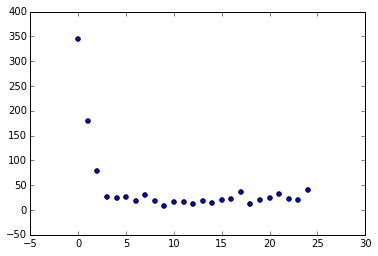

In [37]:
import random, numpy as np
import NeuralNet as NN
params = [100, 0.05, 25, 3, 20] # [Init pop (pop=100), mut rate (=5%), num generations (250), chromosome/solution length (3), # winners/per gen]
curPop = np.random.choice(np.arange(-15,15,step=0.01),size=(params[0],params[3]),replace=False) #initialize current population to random values within range
nextPop = np.zeros((curPop.shape[0], curPop.shape[1]))
fitVec = np.zeros((params[0], 2)) #1st col is indices, 2nd col is cost
for i in range(params[2]): #iterate through num generations
	fitVec = np.array([np.array([x, np.sum(NN.costFunction(NN.X, NN.y, curPop[x].reshape(3,1)))]) for x in range(params[0])]) #Create vec of all errors from cost function
	plt.pyplot.scatter(i,np.sum(fitVec[:,1]))
	winners = np.zeros((params[4], params[3])) #20x2
	for n in range(len(winners)): #for n in range(10)
		selected = np.random.choice(range(len(fitVec)), params[4]/2, replace=False)
		wnr = np.argmin(fitVec[selected,1])
		winners[n] = curPop[int(fitVec[selected[wnr]][0])]
	nextPop[:len(winners)] = winners #populate new gen with winners
	nextPop[len(winners):] = np.array([np.array(np.random.permutation(np.repeat(winners[:, x], ((params[0] - len(winners))/len(winners)), axis=0))) for x in range(winners.shape[1])]).T #Populate the rest of the generation with offspring of mating pairs
	nextPop = np.multiply(nextPop, np.matrix([np.float(np.random.normal(0,2,1)) if random.random() < params[1] else 1 for x in range(nextPop.size)]).reshape(nextPop.shape)) #randomly mutate part of the population
	curPop = nextPop

best_soln = curPop[np.argmin(fitVec[:,1])]
X = np.array([[0,1,1],[1,1,1],[0,0,1],[1,0,1]])
result = np.round(NN.runForward(X, best_soln.reshape(3,1)))
print("Best Sol'n:\n%s\nCost:%s" % (best_soln,np.sum(NN.costFunction(NN.X, NN.y, best_soln.reshape(3,1)))))
print("When X = \n%s \nhThetaX = \n%s" % (X[:,:2], result,))

Looks like we converge after just <b>4</b> generations! Also notice we get these little bumps in error every 10 generations or so, likely due to a particularly dramatic mutation round.